**Machine Learning Lab Digital Assignemnt-02**

**HARSH AGRAWAL-22BCE2391**


In [1]:
import pandas as pd
import csv
import numpy as np

1. Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis 
based on a given set of training data samples. Read the training data from a .CSV file. 

In [2]:
num_attributes = 6
a = []
print("\n The Given Training Data Set \n")
with open('enjoysport.csv', 'r') as csvfile:
 reader = csv.reader(csvfile)
 for row in reader:
    a.append (row)
 print(row)
print("\n The initial value of hypothesis: ")
hypothesis = ['0'] * num_attributes
print(hypothesis)
for j in range(0,num_attributes):
 hypothesis[j] = a[0][j]
print("\n Find S: Finding a Maximally Specific Hypothesis\n")
for i in range(0,len(a)):
 if a[i][num_attributes]=='yes':
    for j in range(0,num_attributes):
        if a[i][j]!=hypothesis[j]:
            hypothesis[j]='?'
        else :
            hypothesis[j]= a[i][j]
 print(" For Training instance No:{0} the hypothesis is".format(i),hypothesis)

print("\n The Maximally Specific Hypothesis for a given Training Examples :\n")
print(hypothesis)


 The Given Training Data Set 

['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', '1']

 The initial value of hypothesis: 
['0', '0', '0', '0', '0', '0']

 Find S: Finding a Maximally Specific Hypothesis

 For Training instance No:0 the hypothesis is ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']
 For Training instance No:1 the hypothesis is ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']
 For Training instance No:2 the hypothesis is ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']
 For Training instance No:3 the hypothesis is ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']
 For Training instance No:4 the hypothesis is ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']

 The Maximally Specific Hypothesis for a given Training Examples :

['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']


2. For a given set of training data examples stored in a .CSV file, implement and demonstrate 
the Candidate-Elimination algorithm to output a description of the set of all hypotheses 
consistent with the training examples. 

In [3]:
data = pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
print(data)
# Separating concept features from Target
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
# Isolating target into a separate DataFrame
# copying last column to target array
target = np.array(data.iloc[:,-1])
print(target)


     Sky AirTemp Humidity    Wind Water Forecast  EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same           1
1  Sunny    Warm     High  Strong  Warm     Same           1
2  Rainy    Cold     High  Strong  Warm   Change           0
3  Sunny    Warm     High  Strong  Cool   Change           1
[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
[1 1 0 1]


In [4]:
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and general_h")
    print(specific_h)

    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("\nSteps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
        indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

In [5]:
s_final, g_final = learn(concepts, target)
print("\nFinal Specific_h:", s_final, sep="\n")
print("\nFinal General_h:", g_final, sep="\n")


Initialization of specific_h and general_h
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 1
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 2
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 3
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', 

3. Write a python program to demonstrate the working of the Regression models. Use an 
appropriate data set for building the regression model and apply this knowledge to classify a 
new sample.

    a. Split data into a train and a test split in different ratio’s (like 70% and 30% or 80% 
    and 20% respectively). 

    b. Conduct experiments with simple regression model 

    c. For each different ratio of regression model calculate and compare the accuracy 
    using the performance metrics R-square, MAE, MSE and RMSE.

    d. Create Scatter plot to display the regression line. 
    
    e. Compare the performance results using Matplotlib, plot the performance measure 
    scores as per your choice like bar chart, box plot etc. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [7]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [8]:
def plot_regression_line(model, X, y):
    plt.scatter(X, y, color='blue')
    plt.plot(X, model.predict(X), color='red')
    plt.title("Regression Line")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.show()

In [9]:
def plot_performance(metrics, ratios):
    metrics_df = pd.DataFrame(metrics, columns=["R2", "MAE", "MSE", "RMSE"], index=ratios)
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title("Performance Metrics for Different Train-Test Splits")
    plt.xlabel("Train-Test Split Ratio")
    plt.ylabel("Score")
    plt.show()



Train-Test Split: 70%-30%
R-squared: 0.925
MAE: 1.497
MSE: 3.121
RMSE: 1.767


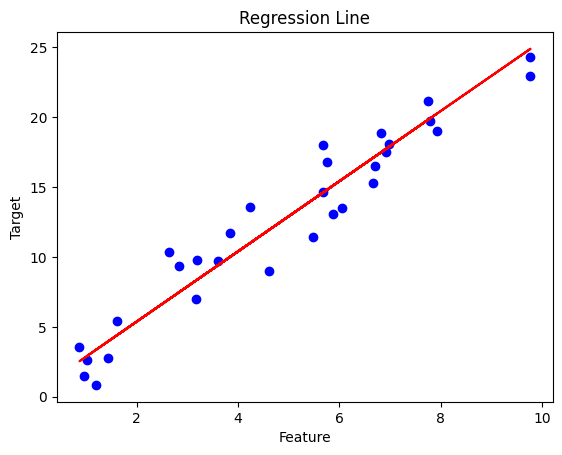


Train-Test Split: 80%-20%
R-squared: 0.896
MAE: 1.603
MSE: 3.671
RMSE: 1.916


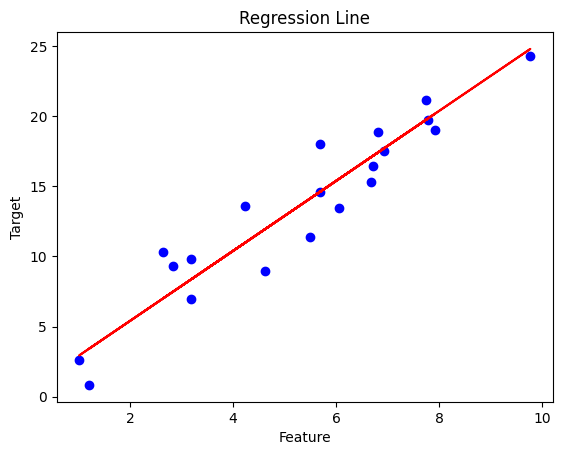

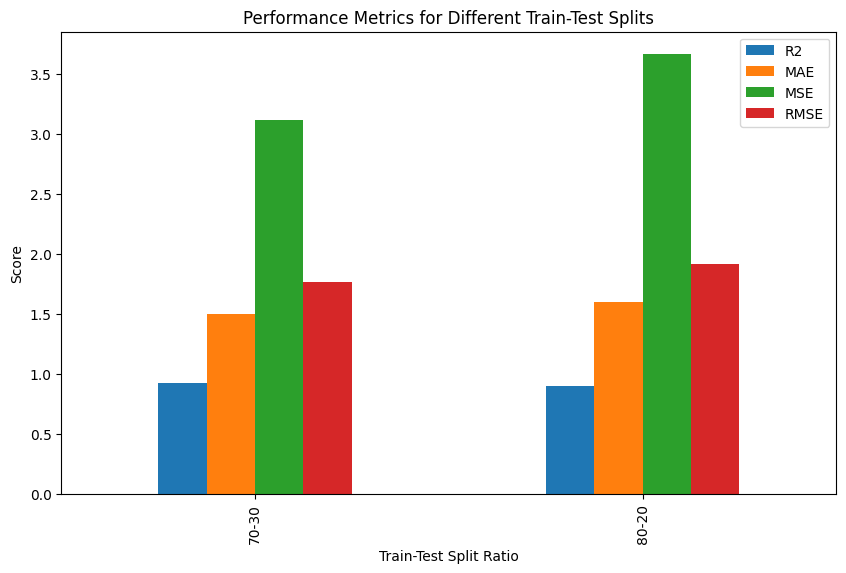

In [10]:
def main():
    # Generate or load a dataset
    data_size = 100
    np.random.seed(0)
    X = np.random.rand(data_size, 1) * 10  # Feature
    y = 2.5 * X.flatten() + np.random.randn(data_size) * 2  # Target

    ratios = [(0.7, 0.3), (0.8, 0.2)]
    metrics = []

    for train_ratio, test_ratio in ratios:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)

        r2, mae, mse, rmse = evaluate_model(model, X_test, y_test)
        metrics.append([r2, mae, mse, rmse])

        print(f"\nTrain-Test Split: {int(train_ratio*100)}%-{int(test_ratio*100)}%")
        print(f"R-squared: {r2:.3f}")
        print(f"MAE: {mae:.3f}")
        print(f"MSE: {mse:.3f}")
        print(f"RMSE: {rmse:.3f}")

        plot_regression_line(model, X_test, y_test)

    plot_performance(metrics, [f"{int(t[0]*100)}-{int(t[1]*100)}" for t in ratios])

if __name__ == "__main__":
    main()

4. Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use 
an appropriate data set for building the decision tree and apply this knowledge to classify a 
new sample.

In [11]:
def read_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        headers = next(datareader)
        metadata = []
        traindata = []
        for name in headers:
            metadata.append(name)
        for row in datareader:
            traindata.append(row)

    return (metadata, traindata)

In [12]:
class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""
        
    def __str__(self):
        return self.attribute

In [13]:
def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)    
    
    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1
                
    for x in range(items.shape[0]):
        dict[items[x]] = np.empty((int(count[x].item()), data.shape[1]), dtype="|S32")
        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1       
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)
        
    return items, dict

In [14]:
def entropy(S):
    items = np.unique(S)

    if items.size == 1:
        return 0
    
    counts = np.zeros((items.shape[0], 1))
    sums = 0
    
    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)

    for count in counts:
        sums += -1 * count * np.log2(count)
    return sums

def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False) 
                
    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))
    
    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * np.log2(ratio)
        
    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)
    
    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]
        
    return total_entropy / iv

In [15]:
def create_node(data, metadata):
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node
        
    gains = np.zeros((data.shape[1] - 1, 1))
    
    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)
        
    split = np.argmax(gains)
    
    node = Node(metadata[split])    
    metadata = np.delete(metadata, split, 0)    
    
    items, dict = subtables(data, split, delete=True)
    
    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))
    
    return node

def empty(size):
    s = ""
    for x in range(size):
        s += "   "
    return s

def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
        return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)

In [16]:
metadata, traindata = read_data("tennisdata.csv")
data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)

 Outlook
    Overcast
       b'Yes'
    Rainy
       Windy
          b'False'
             b'Yes'
          b'True'
             b'No'
    Sunny
       Humidity
          b'High'
             b'No'
          b'Normal'
             b'Yes'


5. Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. 
Print both correct and wrong predictions. 

In [17]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [18]:
dataset=load_iris()
print(dataset)
X_train,X_test,y_train,y_test=train_test_split(dataset["data"],dataset["target"],random_state=0)
kn=KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train,y_train)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

KNeighborsClassifier(n_neighbors=1)

In [19]:
for i in range(len(X_test)):
    x=X_test[i]
    x_new=np.array([x])
    prediction=kn.predict(x_new)
    print("TARGET=",y_test[i],dataset["target_names"][y_test[i]],"PREDICTED=",prediction,dataset["target_names"][prediction])
print(kn.score(X_test,y_test))

TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] [

6. Train SVM classifier using sklearn digits dataset( i.e from sklearn datasets import load_digits) 
and then 

a. Measure accuracy of your model using different kernels such as rbf and linear. 

b. Tune your model further using regularization and gamma parameters and try to 
come up highest accuracy score. 

c. Use 80% of samples as training data size.

In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

Kernel: linear, C: 1.0, Gamma: scale
Accuracy: 0.9778

Kernel: rbf, C: 1.0, Gamma: scale
Accuracy: 0.9861

Kernel: rbf, C: 0.1, Gamma: scale
Accuracy: 0.9500

Kernel: rbf, C: 0.1, Gamma: auto
Accuracy: 0.0778

Kernel: rbf, C: 0.1, Gamma: 0.01
Accuracy: 0.0778

Kernel: rbf, C: 0.1, Gamma: 0.1
Accuracy: 0.0778

Kernel: rbf, C: 1, Gamma: scale
Accuracy: 0.9861

Kernel: rbf, C: 1, Gamma: auto
Accuracy: 0.4667

Kernel: rbf, C: 1, Gamma: 0.01
Accuracy: 0.7917

Kernel: rbf, C: 1, Gamma: 0.1
Accuracy: 0.0778

Kernel: rbf, C: 10, Gamma: scale
Accuracy: 0.9861

Kernel: rbf, C: 10, Gamma: auto
Accuracy: 0.5222

Kernel: rbf, C: 10, Gamma: 0.01
Accuracy: 0.8139

Kernel: rbf, C: 10, Gamma: 0.1
Accuracy: 0.0778

Best Parameters for RBF Kernel:
C: 1, Gamma: scale, Accuracy: 0.9861



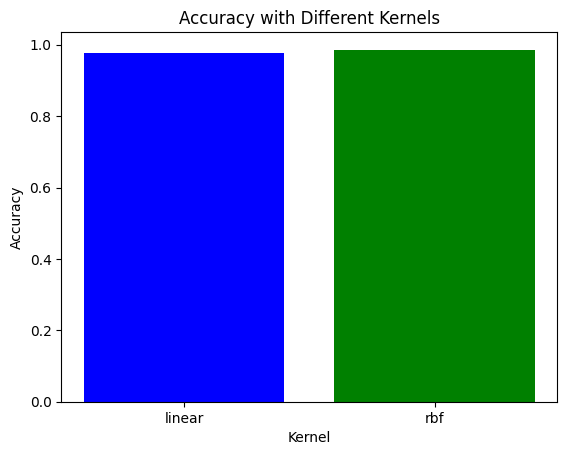

In [21]:
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel, C=1.0, gamma='scale'):
    model = SVC(kernel=kernel, C=C, gamma=gamma)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, C: {C}, Gamma: {gamma}")
    print(f"Accuracy: {accuracy:.4f}\n")
    return accuracy

def main():
    digits = load_digits()
    X, y = digits.data, digits.target
    # Split data (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Measure accuracy with different kernels
    kernels = ['linear', 'rbf']
    accuracies = {}

    for kernel in kernels:
        accuracy = train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel)
        accuracies[kernel] = accuracy
    best_accuracy = 0
    best_params = {}
    #Tune Models further
    for C in [0.1, 1, 10]:
        for gamma in ['scale', 'auto', 0.01, 0.1]:
            accuracy = train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel='rbf', C=C, gamma=gamma)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'C': C, 'gamma': gamma}

    print("Best Parameters for RBF Kernel:")
    print(f"C: {best_params['C']}, Gamma: {best_params['gamma']}, Accuracy: {best_accuracy:.4f}\n")
    #Plot accuracies
    plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green'])
    plt.title("Accuracy with Different Kernels")
    plt.xlabel("Kernel")
    plt.ylabel("Accuracy")
    plt.show()

if __name__ == "__main__":
    main()